In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer, PorterStemmer
%matplotlib inline


Import DataFrames

In [4]:
billie = pd.read_csv('data/billie2019.csv')

Clean DataFrame

In [5]:
billie.head()

,song,link,lyrics
0,!!!!!!!,https://genius.com/Billie-eilish--lyrics,"['[Spoken: Billie Eilish & FINNEAS]', 'My Invi..."
1,​bad guy,https://genius.com/Billie-eilish-bad-guy-lyrics,"['[Verse 1]', 'White shirt now red, my bloody ..."
2,​xanny,https://genius.com/Billie-eilish-xanny-lyrics,"['[Verse 1]', 'What is it about them?', 'I mus..."
3,​you should see me in a crown,https://genius.com/Billie-eilish-you-should-se...,"['[Verse 1]', 'Bite my tongue, bide my time', ..."
4,​all the good girls go to hell,https://genius.com/Billie-eilish-all-the-good-...,"['[Intro]', 'My Lucifer is lonely', '', '[Vers..."


In [6]:
stop_words = ['Bridge', 'Chorus', 'Interlude', 'Intro', 'Mehki Raine',
             'Outro', 'Pre-Chorus', 'Spoken Billie Eilish', 'FINNEAS',
             'Verse 1', 'Verse 2']

In [7]:
#remove punctuation from lyrics column 
billie['lyrics'] = billie['lyrics'].str.replace('[^\w\s]', "")

#remove stop words
billie['lyrics'] = billie['lyrics'].str.replace('|'.join(stop_words), '')

#set to lowercase
billie['lyrics'] = billie['lyrics'].map(lambda x: x.lower())

#create word count column
billie['word_count'] = billie['lyrics'].apply(lambda x: len(x.split()))

#unique word count
billie['unique_word'] = billie['lyrics'].apply(set).apply(len)

songs that contained the most lyrics

In [8]:
billie.sort_values(by = "unique_word", ascending = False)[['song', 'unique_word']][:3]

,song,unique_word
5,​wish you were gay,28
8,​my strange addiction,27
11,​listen before i go,26


In [9]:
billie.sort_values(by = "word_count", ascending = False)[['song', 'word_count']][:3]

,song,word_count
9,​bury a friend,413
8,​my strange addiction,326
5,​wish you were gay,265


# Sentiment Analyzer

In [10]:
sia = SentimentIntensityAnalyzer()

In [11]:
sia_table = []
for i in billie['lyrics']:
    sia_scores = {}
    sia_scores['sia_positive'] = sia.polarity_scores(i)['pos']
    sia_scores['sia_negative'] = sia.polarity_scores(i)['neg']
    sia_scores['sia_neutral'] = sia.polarity_scores(i)['neu']
    sia_scores['sia_compound'] = sia.polarity_scores(i)['compound']

    sia_table.append(sia_scores)
    
sia_table = pd.DataFrame(sia_table)
billie = pd.concat([billie, sia_table], axis = 1)

In [12]:
billie.head()

,song,link,lyrics,word_count,unique_word,sia_positive,sia_negative,sia_neutral,sia_compound
0,!!!!!!!,https://genius.com/Billie-eilish--lyrics,my invisalign has finally i have taken out ...,23,19,0.000,0.000,1.000,0.0000
1,​bad guy,https://genius.com/Billie-eilish-bad-guy-lyrics,white shirt now red my bloody nose sleepin yo...,259,24,0.101,0.283,0.615,-0.9965
2,​xanny,https://genius.com/Billie-eilish-xanny-lyrics,what is it about them i must be missing somet...,229,25,0.137,0.151,0.712,-0.5818
3,​you should see me in a crown,https://genius.com/Billie-eilish-you-should-se...,bite my tongue bide my time wearing a warning...,257,24,0.082,0.038,0.880,0.8948
4,​all the good girls go to hell,https://genius.com/Billie-eilish-all-the-good-...,my lucifer is lonely standing there killing...,218,23,0.164,0.263,0.573,-0.9866


# Most Common Terms

In [13]:
X = billie['lyrics']

In [134]:
custom_stop = list(ENGLISH_STOP_WORDS)
nostop = []

In [181]:
def ngramwords(vecttype, list_ngram, titlelist, list_colors):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (20,13))
    plt.subplots_adjust(hspace = 0.6)
    
    ax = ax.ravel()
    for i, vectorizer in enumerate(vecttype):
        vec = vectorizer(ngram_range = list_ngram[i])
        words_df = pd.DataFrame(vec.fit_transform(X).todense(), columns = vec.get_feature_names())
        top_10 = words_df.sum().sort_values(ascending = True).tail(10)
        top_10.plot.bar(ax = ax[i], color = list_colors[i])
        plt.setp(ax[i].get_xticklabels(), ha = "right", rotation = 45)
        
    for i, title in enumerate(titlelist):
        ax[i].set_title(title)

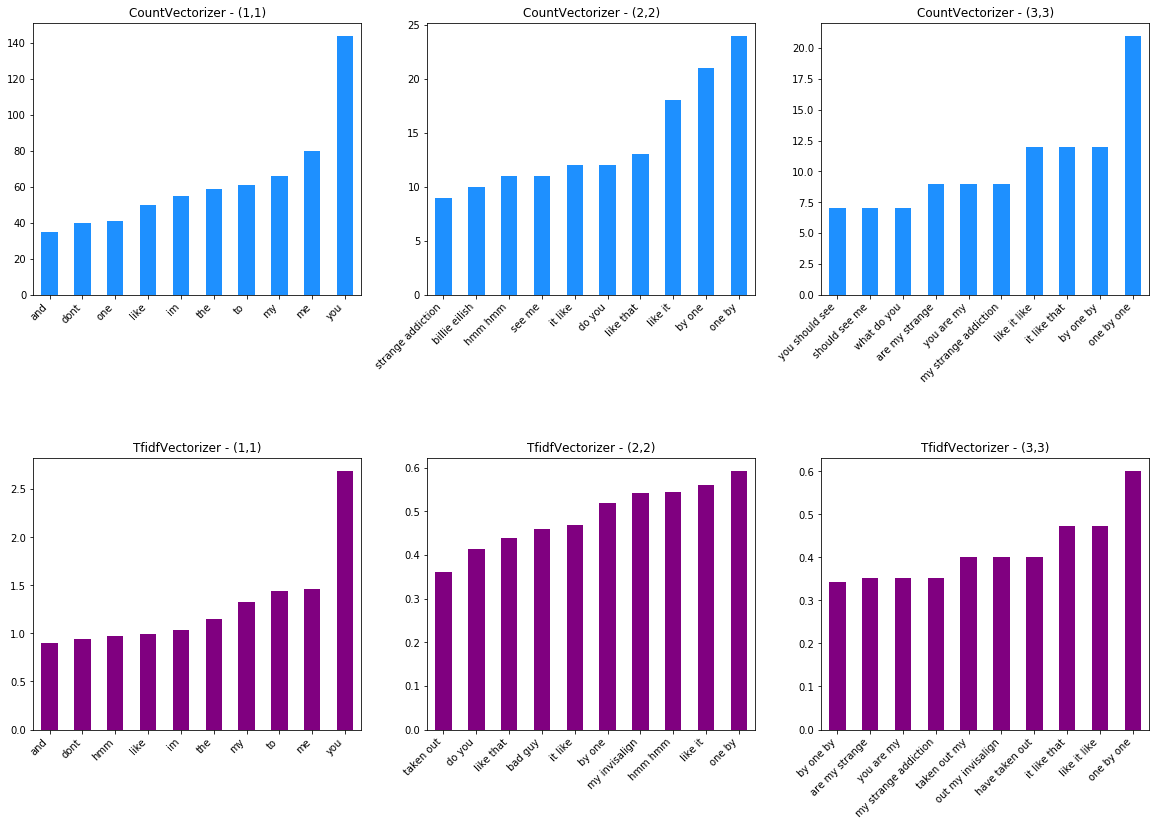

In [182]:
ngramwords([CountVectorizer, CountVectorizer, CountVectorizer, TfidfVectorizer, TfidfVectorizer, TfidfVectorizer],
          [(1,1), (2,2), (3,3), (1,1), (2,2), (3,3)],
          ['CountVectorizer - (1,1)', 'CountVectorizer - (2,2)', 'CountVectorizer - (3,3)',
          'TfidfVectorizer - (1,1)', 'TfidfVectorizer - (2,2)', 'TfidfVectorizer - (3,3)'],
          ['dodgerblue', 'dodgerblue', 'dodgerblue', 'purple', 'purple', 'purple'])

# LDA = TOPIC MODELING